# Problem 3: Transfer Learning and Domain Adaptation

The goal of domain adaptation is to transfer the knowledge of a model to a different but related data distribution. The model is trained on a source dataset and applied to a target dataset (usually unlabeled). For Problem 3, the model will be trained on regular MNIST images, but we want to get good performance on MNIST with random color (without any labels).


**Problem Statement** Given a labelled source domain (MNIST) and an unlabelled target domain (MNIST-M). We would like to train a classifier or a predictor which would give accurate predictions on the target domain.

**Assumptions** Probability distribution of source domain is not equal to the probability distribution of target domain. The conditional probability distribution of the labels given an instance from the source domain is equal to the conditional probability distribution of the labels given an instance from the target domain. Source dataset is labelled. Target dataset is unlabelled.

**Approach** Here, we adopt the DABP method mentioned in the paper “Unsupervised Domain Adaptation by Backpropagation”.

* Feature Extractor (green): This is a neural network that will learn to perform the transformation on the source and target distribution.
* Label Classifier (blue): This is a neural network that will learn to perform the classification on the transformed source distribution. Since, the source domain is labelled.
* Domain Classifier (red): This is a neural network that will predict whether the output of the Feature Extractor is from the source distribution or the target distribution.



By using the above three components, the Feature Extractor will learn to produce discriminative and domain-invariant features.

In [2]:
# download the codes from Git
!git clone https://github.com/Haotian-Zhang/Pytorch_DABP.git

Cloning into 'Pytorch_DABP'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 34 (delta 2), reused 1 (delta 1), pack-reused 30 (from 1)
Receiving objects: 100% (34/34), 17.21 KiB | 419.00 KiB/s, done.
Resolving deltas: 100% (12/12), done.


Train the DABP model by running `main.py` and answer the following questions.


* Q1: Perform **3** experiments on training and report your source and target accuracy in the tables below. (Your result is the average of the Target Accs. based on 3 experiments)

**Source Only**

|                | Test1 | Test2 | Test3 |
|----------------|:-----:|:-----:|:-----:|
| Source Acc (%) |  99.11  |       |       |
| Target Acc (%) |  63.88  |       |      |

|          | Paper | Your Result |
|----------|:-----:|:-----------:|
| DABP (%) | 52.25 |          |

**DANN**

|                | Test1 | Test2 | Test3 |
|----------------|:-----:|:-----:|:-----:|
| Source Acc (%) | 99.05   |       |        |
| Target Acc (%) | 70.57  |       |       |

|          | Paper | Your Result |
|----------|:-----:|:-----------:|
| DABP (%) | 76.66 |          |



In [ ]:
!python Pytorch_DABP/main.py

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>

100% 9912422/9912422 [00:02<00:00, 4057987.30it/s]
Extracting data/pytorch/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to data/pytorch/MNIST/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>

100% 28881/28881 [00:00<00:00, 475808.83it/s]
Extracting data/pytorch/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to data/pytorch/MNIST/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>

100% 1648877/1648877 [00:01<00:00, 1079256.77it/s]
Extracting data/pytorch/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to data/pytorch/MNIST/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify faile

In [ ]:
# zip the checkpoint and download it
# !zip -r saved_plot.zip saved_plot
# !zip -r trained_models.zip trained_models

# from google.colab import files
# files.download('saved_plot.zip')
# files.download('trained_models.zip')

* Q2: Write your own codes to visualize the feature space by using the TSNE(perplexity=30, n_components=2, init=’pca’, n_iter=3000). Plot the feature distributions for both (1) original MNIST and MNIST-M inputs and (2) after DABP using source only (3) after DABP using dann.(**You will find useful functions inside the `utils`function.** )

(1) Original MNIST and MNIST-M inputs

In [1]:
# fix file path in google colab
from google.colab import drive
drive.mount('/content/drive')

# change path
import os
os.chdir('/content/drive/MyDrive/HW2-3')

Mounted at /content/drive


In [3]:
# todo
# !unzip trained_models.zip -d /content/drive/MyDrive/Colab
%cd /content/drive/MyDrive/Colab/Pytorch_DABP

import sys
sys.path.append('/content/drive/MyDrive/HW2-3/Pytorch_DABP')

!pwd
!ls

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab/Pytorch_DABP'
/content
/content/drive/MyDrive/HW2-3
HW2.pdf  problem1.ipynb  problem2.ipynb  problem3.ipynb  Pytorch_DABP


cuda
visualizing mnist and mnistm dataset


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Extract features to draw T-SNE plot...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Draw plot ...
saved_plot/input_mnist_n_mnistM.png is saved


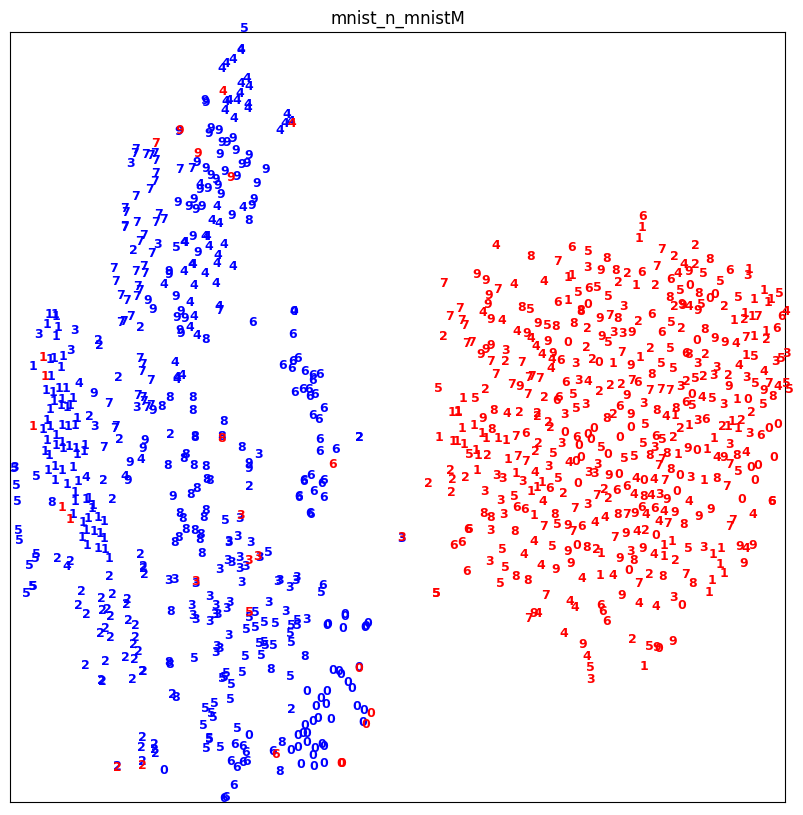

In [5]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import mnist
import mnistm
from utils import visualize, visualize_input

# # get device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


print("visualizing mnist and mnistm dataset")
visualize_input()
# tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3000)

In [ ]:
# todo

(2) After DABP using source only

<ipython-input-18-e4079c502c17>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder.load_state_dict(torch.load(encoder_path))
/usr/local/lib/python3.10/dist-packages/to

Extract features to draw T-SNE plot...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Draw plot ...
saved_plot/source_after_dabp_source.png is saved


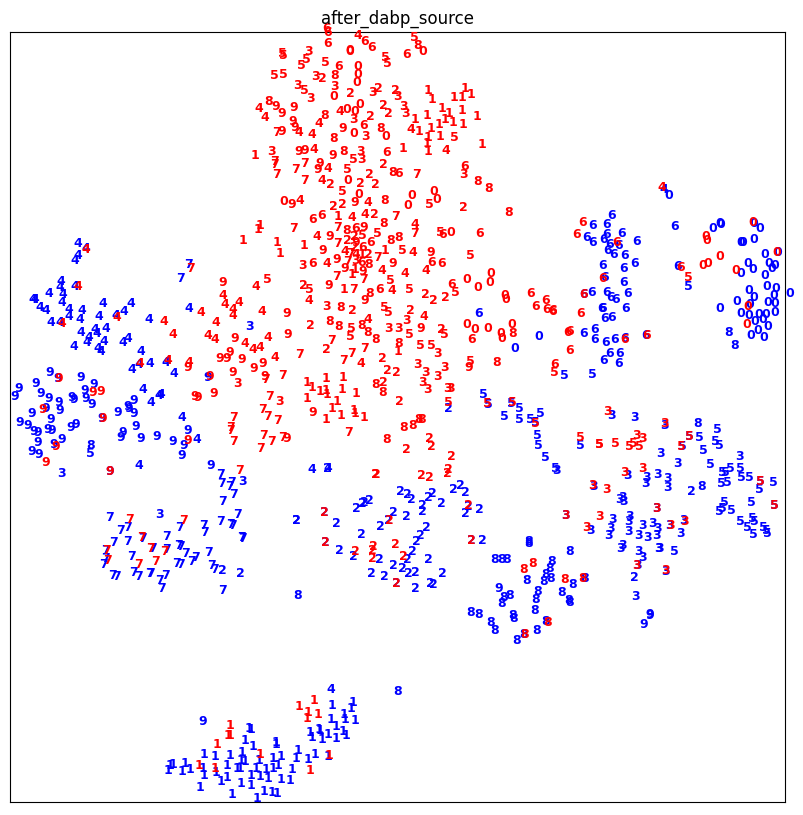

In [18]:
# todo
# visualize(encoder, training_mode, save_name)
import model
encoder = model.Extractor()

encoder_path = '/content/drive/MyDrive/HW2-3/trained_models/encoder_source_omg.pt'
encoder.load_state_dict(torch.load(encoder_path))

encoder.to(device)

training_mode = 'source'
save_name = 'after_dabp'
visualize(encoder, training_mode, save_name)

 (3) After DABP using dann

<ipython-input-19-c668f18bf144>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder.load_state_dict(torch.load(encoder_path))
/usr/local/lib/python3.10/dist-packages/to

Extract features to draw T-SNE plot...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Draw plot ...
saved_plot/dann_after_dabp_dann.png is saved


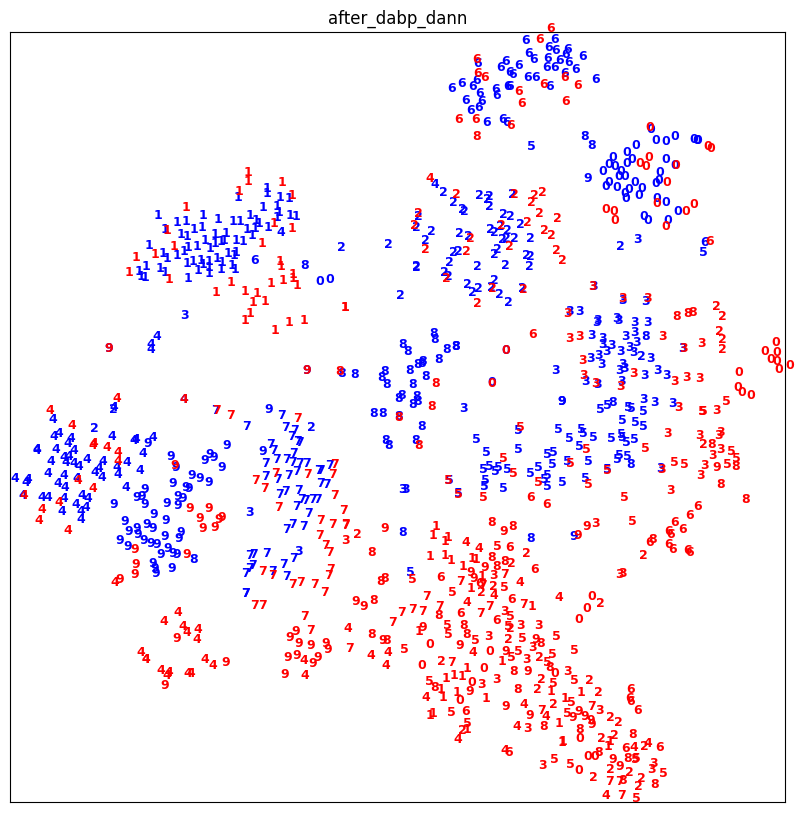

In [19]:
# todo
# visualize(encoder, training_mode, save_name)
import model
encoder = model.Extractor()

encoder_path = '/content/drive/MyDrive/HW2-3/trained_models/encoder_dann_omg.pt'
encoder.load_state_dict(torch.load(encoder_path))

encoder.to(device)

training_mode = 'dann'
save_name = 'after_dabp'
visualize(encoder, training_mode, save_name)

## Discussions

(1) From the results in Q2, are the both domains closer/farther after performing the transformation? If the answer is closer, it verifies that DABP can learn discriminative and domain invariant features. If not, explain your reasons.



Yes, both domains are closing after performing the transformation.

(2) List one of the main problems for the DABP method and explain why?

DABP struggles with large domain differences, like variations in data distribution, lighting, or backgrounds. Its adversarial method can only align features to a point, making it less effective when the domain gap is substantial.